# Desafio Spike

## 1- Loading files

In [80]:
import pandas as pd

df_rain = pd.read_csv('precipitaciones.csv')
df_bank = pd.read_csv('banco_central.csv')

## 2- Análisis de datos

Realizar un análisis exploratorio de los datos

In [81]:
print(f'Dataframe df_rain has {df_rain.shape[0]} rows '
      f'and {df_rain.shape[1]} columns')
print(f'Dataframe df_bank has {df_bank.shape[0]} rows '
      f'and {df_bank.shape[1]} columns')

Dataframe df_rain has 496 rows and 9 columns
Dataframe df_bank has 614 rows and 85 columns


Tipos de datos

In [82]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB


Todas las columnas, salvo la fecha son tipo float y no tienen valores nulos

In [83]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

La mayor parte de las columnas tienen valores nulos y son de tipo object, lo que implica que quizás sea necesaria más adelante una transformación y el uso del algun método de resampling

In [84]:
df_rain.head()

date  Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
0  1989-02-01  0.719033    0.117045                   0.028272   
1  1998-10-01  0.065216    0.000000                   0.011493   
2  2001-02-01  2.030026    0.047987                   0.002634   
3  2008-11-01  0.622784    0.000000                   0.015872   
4  2009-04-01  0.008065    0.000000                   0.009396   

   Libertador_Gral__Bernardo_O_Higgins      Maule     Biobio  La_Araucania  \
0                                  0.0   0.724667   9.172945     22.595834   
1                                  0.0   0.008968   2.089674     14.702087   
2                                  0.0   0.032163  10.768351     29.465057   
3                                  0.0   1.734168  25.083557     64.901645   
4                                  0.0  12.080715  56.233424     96.364235   

     Los_Rios  
0   52.268010  
1   45.142041  
2   65.571098  
3  113.093488  
4  155.622235

Dado que el dataframe de métricas economicas tiene tanta información seleccionaré aquellas variables que parecen pertinentes con el problema en cuestion para visualizar

In [85]:
df_bank.columns

Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [86]:
df_bank[['Periodo', 'PIB_Agropecuario_silvicola',
         'PIB_Alimentos', 'Ocupacion_en_Agricultura_INE']].head()

Periodo PIB_Agropecuario_silvicola PIB_Alimentos  \
0  2013-03-01 00:00:00 UTC                579.846.819   367.818.436   
1  2013-04-01 00:00:00 UTC                374.895.706    38.211.344   
2  2013-05-01 00:00:00 UTC                311.356.127    37.345.015   
3  2013-06-01 00:00:00 UTC                246.592.082   323.857.815   
4  2013-07-01 00:00:00 UTC                201.156.433   327.206.582   

  Ocupacion_en_Agricultura_INE  
0                  798.092.771  
1                  748.761.346  
2                  689.928.412  
3                  643.035.387  
4                  625.955.595

__NOTA IMPORTANTE__: Qué es el IMACEC? Indice mensual de actividad economica

Dentro de las columnas que se incluyen los datos econmicos se pueden distinguir algunos grupos, lo que nos entrega la posibilidad de separarlos e identificar relaciones dentro de estos

In [87]:
imacec = []
pib = []
price = []
ocupation = []
index = []
others = []

# divide columns in groups
for column in df_bank.columns:
    if "Imacec" in column:
        imacec.append(column)
    elif "PIB" in column:
        pib.append(column)
    elif "Precio" in column:
        price.append(column)
    elif "Ocupacion" in column:
        ocupation.append(column)
    elif "Indice" in column:
        index.append(column)
    else:
        others.append(column)

Como la mayoria de los datos son float vamos a tratar de transformarlos a ese formato, debemos considerar que los valores en este momento son string y tienen unos . entre medio

In [88]:
df_bank["PIB_Agropecuario_silvicola"].replace(".", "")

0      579.846.819
1      374.895.706
2      311.356.127
3      246.592.082
4      201.156.433
          ...     
609            NaN
610            NaN
611            NaN
612            NaN
613            NaN
Name: PIB_Agropecuario_silvicola, Length: 614, dtype: object

In [89]:
from pandas.core.frame import DataFrame

def transform_columns(df_bank: DataFrame) -> DataFrame:
    """
    try to transform all columns values in float values
    """
    for column in df_bank.columns:
        try:
            df_bank[column] = df_bank[column].\
                apply(lambda x: x.replace(".", "") if type(x)==str else x)\
                .astype(float)
        except Exception as e:       
            print(e)
    return df_bank

df_bank = transform_columns(df_bank)


could not convert string to float: '2013-03-01 00:00:00 UTC'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'
could not convert string to float: 'a'


Tal parece que hay algunas 'a' entre los datos

In [90]:
df_bank[df_bank['Imacec_industria'] == 'a']

Periodo  Imacec_empalmado  Imacec_produccion_de_bienes  \
176  1972-07-01 00:00:00 UTC               NaN                          NaN   

     Imacec_minero Imacec_industria  Imacec_resto_de_bienes  Imacec_comercio  \
176            NaN                a                     NaN              NaN   

     Imacec_servicios  Imacec_a_costo_de_factores  Imacec_no_minero  ...  \
176               NaN                         NaN               NaN  ...   

    Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
176                                                NaN      

     Indice_de_produccion_industrial  \
176                              NaN   

     Indice_de_produccion_industrial__mineria  \
176                                       NaN   

     Indice_de_produccion_industrial_electricidad__gas_y_agua  \
176                                                NaN          

     Indice_de_produccion_industrial__manufacturera  \
176                                             NaN   

    Generacion_de_energia_electrica_CDEC_GWh  \
176                                      NaN   

     Indice_de_ventas_comercio_real_IVCM  \
176                                  NaN   

     Indice_de_ventas_comercio_real_no_durables_IVCM  \
176                                              NaN   

     Indice_de_ventas_comercio_real_durables_IVCM  Ventas_autos_nuevos  
176                                           NaN                  NaN  

[1 rows x 85 columns]

Eliminamos las 'a'

In [91]:
import numpy as np

df_bank = df_bank.replace('a', np.nan)

In [92]:
df_bank= transform_columns(df_bank)

could not convert string to float: '2013-03-01 00:00:00 UTC'


In [93]:
g = df_bank.columns.to_series().groupby(df_bank.dtypes).groups
 
# Print varaible types
print({k.name: v for k, v in g.items()}.keys())
{k.name: v for k, v in g.items()}['object']

dict_keys(['float64', 'object'])


Index(['Periodo'], dtype='object')

La unica columna que quedo sin transforma fue la fecha

Eliminamos todo lo que sea una columna o fila vacia

In [94]:
df_bank.dropna(how='all', axis=0, inplace=True)
df_bank.dropna(how='all', axis=1, inplace=True)
df_bank.shape

(614, 85)

Cambiamos el formato de la fecha a datetime

In [95]:
from datetime import datetime

df_bank = df_bank[df_bank['Periodo'] != '2020-13-01 00:00:00 UTC']

df_bank['Periodo'] = df_bank['Periodo'].\
    apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df_rain['date'] = df_rain['date'].\
    apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

Eliminamos fechas duplicadas

In [96]:
df_bank.drop_duplicates(subset=['Periodo'], inplace=True)
df_bank.shape

(611, 85)

In [97]:
df_bank[imacec].describe().T

count          mean           std         min  \
Imacec_empalmado             298.0  5.072617e+08  3.184064e+08   5296994.0   
Imacec_produccion_de_bienes  298.0  6.131057e+08  3.454198e+08   1014872.0   
Imacec_minero                298.0  6.463457e+08  3.775273e+08  10101996.0   
Imacec_industria             298.0  6.156182e+08  3.437487e+08   1032193.0   
Imacec_resto_de_bienes       298.0  5.559412e+08  3.126310e+08   1027326.0   
Imacec_comercio              298.0  4.619720e+08  2.944751e+08   4237199.0   
Imacec_servicios             298.0  4.436989e+08  3.068782e+08    756372.0   
Imacec_a_costo_de_factores   298.0  4.971921e+08  3.198953e+08   9371354.0   
Imacec_no_minero             298.0  4.828639e+08  3.121258e+08    904338.0   

                                      25%          50%           75%  \
Imacec_empalmado             1.096810e+08  565593693.0  7.780196e+08   
Imacec_produccion_de_bienes  1.104085e+08  752522065.0  8.853628e+08   
Imacec_minero                1.066507e+08  864828629.0  9.427898e+08   
Imacec_industria             1.070720e+08  740851214.5  8.885812e+08   
Imacec_resto_de_bienes       1.292719e+08  630182007.0  8.096839e+08   
Imacec_comercio              1.216797e+08  445710662.0  6.659888e+08   
Imacec_servicios             1.094117e+08  479736954.5  6.876814e+08   
Imacec_a_costo_de_factores   1.084604e+08  572351303.0  7.632146e+08   
Imacec_no_minero             1.102772e+08  524448935.5  7.513513e+08   

                                     max  
Imacec_empalmado             999874817.0  
Imacec_produccion_de_bienes  999272757.0  
Imacec_minero                997576891.0  
Imacec_industria             999212106.0  
Imacec_resto_de_bienes       999584694.0  
Imacec_comercio              997181036.0  
Imacec_servicios             996428565.0  
Imacec_a_costo_de_factores   998153903.0  
Imacec_no_minero             997251169.0

Algo que no cuadra es que los valores del IMACEC sean tan grandes, pero no tengo la información para decidir si son falsos o no

In [98]:
df_bank[ocupation].describe()

Ocupacion_en_Agricultura_INE  \
count                  9.200000e+01   
mean                   6.317171e+08   
std                    1.662356e+08   
min                    6.251775e+07   
25%                    6.303463e+08   
50%                    6.583371e+08   
75%                    7.251262e+08   
max                    7.980928e+08   

       Ocupacion_en_Explotacion_de_minas_y_canteras_INE  \
count                                      9.200000e+01   
mean                                       2.097153e+08   
std                                        6.236686e+07   
min                                        2.630406e+06   
25%                                        2.039036e+08   
50%                                        2.217725e+08   
75%                                        2.431733e+08   
max                                        2.712317e+08   

       Ocupacion_en_Industrias_manufactureras_INE  \
count                                9.200000e+01   
mean                                 7.837023e+08   
std                                  2.862657e+08   
min                                  7.456535e+07   
25%                                  8.594096e+08   
50%                                  9.056330e+08   
75%                                  9.202177e+08   
max                                  9.597854e+08   

       Ocupacion_en_Suministro_de_electricidad_INE  \
count                                 9.200000e+01   
mean                                  4.214670e+08   
std                                   9.279464e+07   
min                                   3.516149e+07   
25%                                   4.045123e+08   
50%                                   4.348760e+08   
75%                                   4.716850e+08   
max                                   5.338811e+08   

       Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE  \
count                                       9.200000e+01                      
mean                                        1.960561e+08                      
std                                         6.680540e+07                      
min                                         2.165196e+06                      
25%                                         1.930939e+08                      
50%                                         2.197435e+08                      
75%                                         2.296828e+08                      
max                                         3.057952e+08                      

       Ocupacion_en_Actividades_profesionales_INE  \
count                                9.200000e+01   
mean                                 2.548088e+08   
std                                  7.184746e+07   
min                                  2.933080e+05   
25%                                  2.522949e+08   
50%                                  2.664327e+08   
75%                                  2.870353e+08   
max                                  3.382503e+08   

       Ocupacion_en_Actividades_inmobiliarias_INE  \
count                                9.200000e+01   
mean                                 6.791650e+08   
std                                  2.232031e+08   
min                                  6.865296e+06   
25%                                  6.355601e+08   
50%                                  7.274387e+08   
75%                                  8.193666e+08   
max                                  9.189085e+08   

       Ocupacion_en_Actividades_financieras_y_de_seguros_INE  \
count                                       9.200000e+01       
mean                                        1.645961e+08       
std                                         4.805692e+07       
min                                         1.656582e+06       
25%                                         1.665433e+08       
50%                                         1.778903e+08       
75%                                       

Lo mismo pasa para el caso de la ocupación... no se Rick, parece falso

Pero pero, tenemos el precio del dolar

In [99]:
df_bank.set_index('Periodo')["Tipo_de_cambio_del_dolar_observado_diario"].\
    tail()

Periodo
2008-08-01       516702.0
2008-09-01        53017.0
2008-10-01    618394545.0
2008-11-01      6515055.0
2008-12-01      6493165.0
Name: Tipo_de_cambio_del_dolar_observado_diario, dtype: float64

Y con la ayuda de google ♥ podemos saber a cuanto estaba el dolar en esas fechas, link aca:  (https://www.sii.cl/pagina/valores/dolar/dolar2008.htm)

Lo bueno, los valores calzan, lo malo... no es llegar y dividir por algo. Probaré solo quedandome con los primeros 3 números.

<AxesSubplot:xlabel='Periodo'>

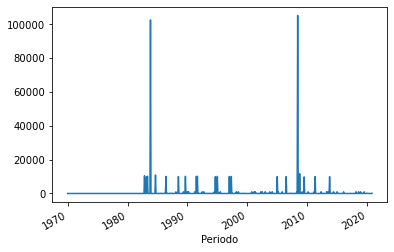

In [100]:
df_bank.set_index('Periodo')['Tipo_de_cambio_del_dolar_observado_diario']\
    .pct_change().plot()

<AxesSubplot:xlabel='Periodo'>

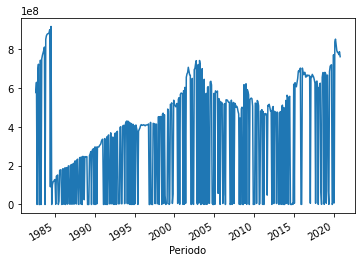

In [101]:
df_bank.set_index('Periodo')['Tipo_de_cambio_del_dolar_observado_diario']\
    .plot()

Definitivamente la cosa no cuadra, y como no basta sacar numeros ni quitar puntos, optaré por otra solucion

Asumiendo que los valores no deberían aumentar tan abruptamente para una misma columna, vamos a construir estas usando ese supuesto (en la practica si podrían aumentar tan abruptamente)

In [102]:
from tqdm import tqdm

def new_values(df):
    df_ = df.copy()
    df_.sort_values(by=['Periodo'], inplace=True, ascending=False)
    df_.reset_index(inplace=True, drop=True)
    
    columns = list(df_.columns)
    columns.remove('Periodo')
    for column in tqdm(columns):
        p_value = None
        for i in range(len(df_)):
            if not (pd.isnull(df_.loc[i, column])): 
                value = str(float(df_.loc[i, column])).replace('.', '')
                while len(str(value)) < 4:
                    value = value + '0'
                value = value[0:4]
                if p_value is not None:
                    try:
                        option1 = abs((p_value - int(str(value)[0:3]))/p_value)
                        option2 = abs((p_value - int(str(value)[0:2]))/p_value)
                        option3 = abs((p_value - int(str(value)[0:4]))/p_value)
                    except ZeroDivisionError:
                        option1 = abs((p_value - int(str(value)[0:3])))
                        option2 = abs((p_value - int(str(value)[0:2])))
                        option3 = abs((p_value - int(str(value)[0:4])))                        
                    if (option1 < option2) and (option1 < option3):
                        df_.loc[i, column] = int(str(value)[0:3])
                        p_value = int(str(value)[0:3])
                    elif (option3 < option2) and (option3 < option1):
                        df_.loc[i, column] = int(str(value)[0:4])
                        p_value = int(str(value)[0:4])
                    else:
                        df_.loc[i, column] = int(str(value)[0:2])
                        p_value = int(str(value)[0:2])                      
                else: 
                    p_value = int(value[0:3])
                    df_.loc[i, column] = int(value[0:3])
    return df_

Reconozco que me averguenzo de ese codigo, no esta para nada optimizado, perdón Python

In [103]:
df2 = new_values(df_bank)

100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [00:06<00:00, 13.84it/s]


In [104]:
df2

Periodo  Imacec_empalmado  Imacec_produccion_de_bienes  Imacec_minero  \
0   2020-11-01               NaN                          NaN            NaN   
1   2020-10-01             108.0                        103.0          103.0   
2   2020-09-01             103.0                         92.0          100.0   
3   2020-08-01             101.0                         92.0          103.0   
4   2020-07-01              96.0                         93.0          104.0   
..         ...               ...                          ...            ...   
606 1970-05-01               NaN                          NaN            NaN   
607 1970-04-01               NaN                          NaN            NaN   
608 1970-03-01               NaN                          NaN            NaN   
609 1970-02-01               NaN                          NaN            NaN   
610 1970-01-01               NaN                          NaN            NaN   

     Imacec_industria  Imacec_resto_de_bienes  Imacec_comercio  \
0                 NaN                     NaN              NaN   
1               108.0                   998.0            116.0   
2               100.0                   793.0            111.0   
3                98.0                   798.0            108.0   
4                96.0                   813.0             93.0   
..                ...                     ...              ...   
606               NaN                     NaN              NaN   
607               NaN                     NaN              NaN   
608               NaN                     NaN              NaN   
609               NaN                     NaN              NaN   
610               NaN                     NaN              NaN   

     Imacec_servicios  Imacec_a_costo_de_factores  Imacec_no_minero  ...  \
0                 NaN                         NaN               NaN  ...   
1               109.0                       108.0             108.0  ...   
2               108.0                       102.0             103.0  ...   
3               104.0                       100.0             100.0  ...   
4                99.0                        96.0              95.0  ...   
..                ...                         ...               ...  ...   
606               NaN                         NaN               NaN  ...   
607               NaN                         NaN               NaN  ...   
608               NaN                         NaN               NaN  ...   
609               NaN                         NaN               NaN  ...   
610               NaN                         NaN               NaN  ...   

     Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
0                                                  NaN       
1                                                102.0       
2                                                100.0       
3                                                101.0       
4                                                100.0       
..                                                 ...       
606                                                NaN       
607                                                NaN       
608                                                NaN       
609                                                NaN       
610                                                NaN       

     Indice_de_produccion_industrial  \
0                                NaN   
1                              104.0   
2                               98.0   
3                               99.0   
4                               97.0   
..                               ...   
606                              NaN   
607                              NaN   
608                              NaN   
609                              NaN   
610                              NaN   

     Indice_de_produccion_industrial__mineria  \
0                                         NaN   
1               

Pero funciona!

In [105]:
df2.set_index('Periodo')['Tipo_de_cambio_del_dolar_observado_diario']

Periodo
2020-11-01    762.0
2020-10-01    788.0
2020-09-01    773.0
2020-08-01    784.0
2020-07-01    784.0
              ...  
1970-05-01      NaN
1970-04-01      NaN
1970-03-01      NaN
1970-02-01      NaN
1970-01-01      NaN
Name: Tipo_de_cambio_del_dolar_observado_diario, Length: 611, dtype: float64

<AxesSubplot:xlabel='Periodo'>

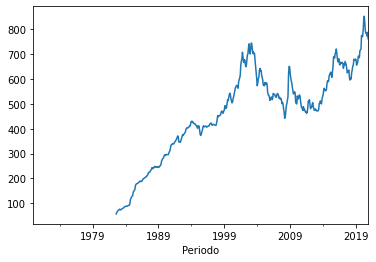

In [106]:
df2.set_index('Periodo')['Tipo_de_cambio_del_dolar_observado_diario']\
    .plot()

En teoría no debería confiar en datos muy antiguos porque la economia se fue abajo, así que me tomaré la libertad de eliminar algunos después

## 3- Visualización

In [107]:
class Norange(Exception):
    """The date is not in range"""
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.message = f'Date is not in range {start} to {end}'
        super().__init__(self.message)


class Noregion(Exception):
    """No region on dataset"""
    def __init__(self, regions, region):
        self.regions = regions
        self.message = f'Region {region} is not in {regions}'
        super().__init__(self.message)

class Nopibseries(Exception):
    """No serie on dataset"""
    def __init__(self, series, serie):
        self.regions = series
        self.message = f'Serie {serie} is not in {series}'
        super().__init__(self.message)

In [108]:
import matplotlib.pyplot as plt

def plot_rain(start: str, end: str, region: str, df_rain: DataFrame):
    '''
    Plot rain data for specifc range of date
    '''
    df_rain.sort_values(by='date', inplace=True)
    # start and en in dataset
    dataset_start = df_rain.date.min()
    dataset_end = df_rain.date.max()
    # regions
    regions = list(df_rain.columns)
    regions.remove('date')
    # datetime start and date plot
    start = datetime.strptime(start, '%Y-%m-%d')
    end = datetime.strptime(end, '%Y-%m-%d')
    if (start < dataset_start) or (end > dataset_end):
        raise Norange(dataset_start, dataset_end)
    if region not in regions:
        raise Noregion(regions, region)
    # Filter
    df_rain_ = df_rain[(df_rain['date'] >= start) &
                       (df_rain['date'] <= end)].set_index('date')
    # Plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df_rain_[region])
    plt.show()
    

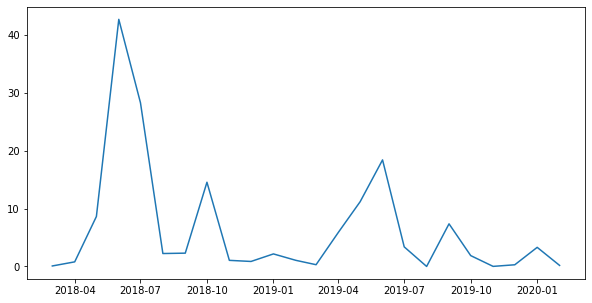

In [109]:
plot_rain('2018-03-01', '2020-02-01', 'Coquimbo', df_rain)

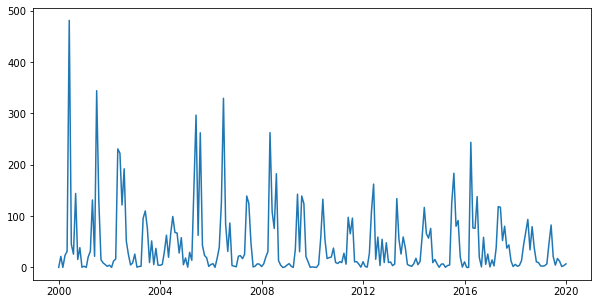

In [110]:
plot_rain('2000-01-01', '2020-01-01', 'Metropolitana_de_Santiago', df_rain)

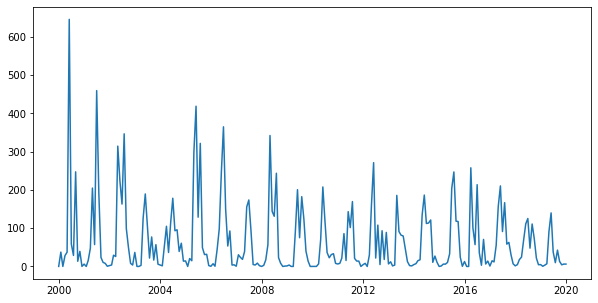

In [111]:
plot_rain('2000-01-01', '2020-01-01', 'Libertador_Gral__Bernardo_O_Higgins', df_rain)

Claramente hay un patron de precipitaciones todos los años en invierno, cuanto llueve en una región esta muy correlacionado con cuanto llueve en la otra y por último (y un poco preocupante) cada vez llueve menos

In [112]:
import calendar

def plot_rain_year(years: list, region: str, df_rain: DataFrame):
    '''
    Plot rain data for years in a specific region
    '''
    # regions
    regions = list(df_rain.columns)
    regions.remove('date')
    if region not in regions:
        raise Noregion(regions, region)

    # Create dataset
    df_rain.sort_values(by='date', inplace=True)
    df_rain['month'] = df_rain['date'].dt.month
    df_rain['year'] = df_rain['date'].dt.year
    a = df_rain[[region, 'month', 'year']]
    a = pd.pivot_table(data=a,index='month', columns='year',
                       values=region).reset_index()
    a['month'] = a['month'].\
        apply(lambda x: calendar.month_name[x])
    a.set_index('month', inplace=True)
    
    # Filter columns
    a = a[years]
    
    # plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(a)
    ax.legend(a.columns, loc='center left',bbox_to_anchor=(1, 0.5))
    plt.show()

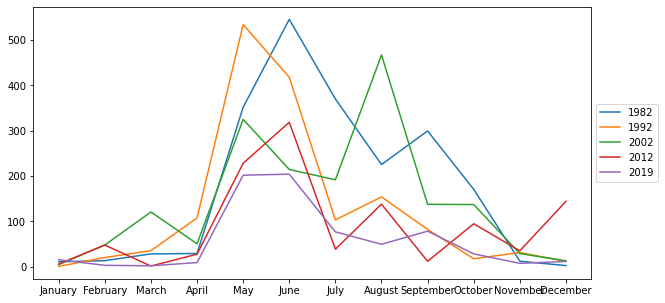

In [113]:
plot_rain_year([1982, 1992, 2002, 2012, 2019], 'Maule', df_rain)

La mayor parte de las precipitaciones se da en los meses de mayo, junio y julio. Los años más lejanos son los que mayor peak de precipitaciones tuvieron

In [114]:
def plot_pib_series(start: str, end: str, pib1: str, pib2:str,
                    df_bank: DataFrame):
    '''
    Plot PIB data in range
    '''
    df_bank.sort_values(by='Periodo', inplace=True)
    
    # start and en in dataset
    dataset_start = df_bank.Periodo.min()
    dataset_end = df_bank.Periodo.max()
    
    # pib
    series = [i for i in list(df_bank.columns) if 'PIB_' in i]
    
    # datetime start and date plot
    start = datetime.strptime(start, '%Y-%m-%d')
    end = datetime.strptime(end, '%Y-%m-%d')
    if (start < dataset_start) or (end > dataset_end):
        raise Norange(dataset_start, dataset_end)
    if pib1 not in series:
        raise Nopibseries(series, pib1)
    elif pib2 not in series:
        raise Nopibseries(series, pib2)
        
    # Filter
    df_bank = df_bank[(df_bank['Periodo'] >= start) &
                       (df_bank['Periodo'] <= end)].set_index('Periodo')
    
    # Plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df_bank[pib1], marker=11, label=pib1)
    ax.plot(df_bank[pib2], label=pib2)
    ax.legend()
    plt.show()
    

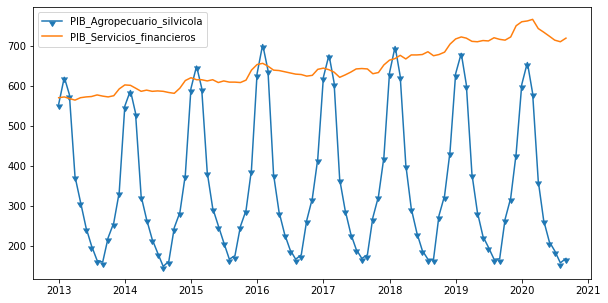

In [115]:
plot_pib_series("2013-01-01",
                df2.Periodo.max().strftime('%Y-%m-%d'),
                'PIB_Agropecuario_silvicola',
                'PIB_Servicios_financieros', df2)

Al parecer el pib agropecuario pasa por estacionalidades fuertes, donde la curva agropecuaria es más alta se nota un aumento en el PIB de servicios financieros aunque este ajusta mucho mejor a una linea recta

## 4- Tratamiento de variables

Si lo que queremso es construir un modelo mucha correlación entre variables no nos ayuda puesto que entre variables muy correlacionadas no estamos obteniendo ingormación nueva.

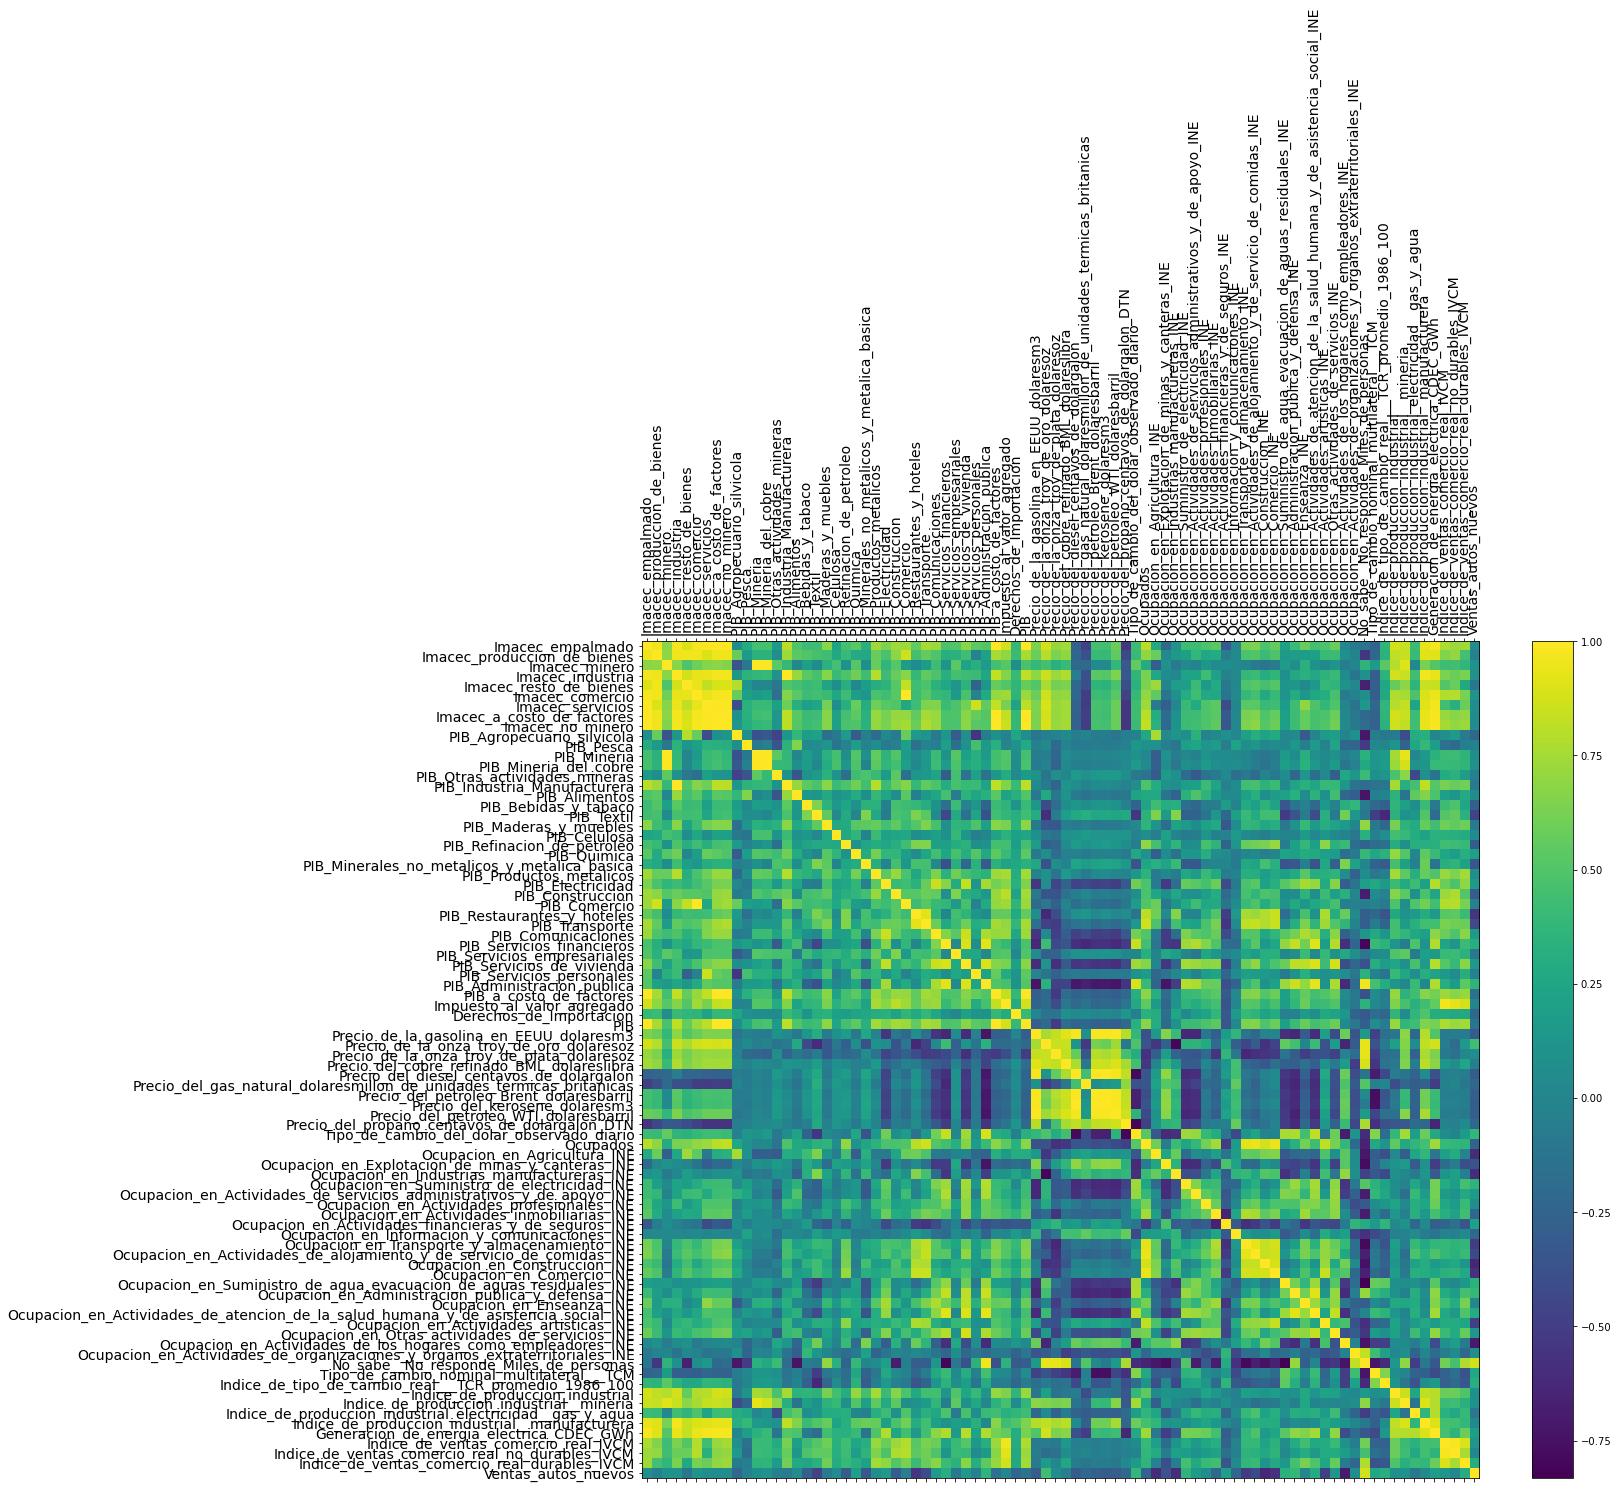

In [116]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.show()

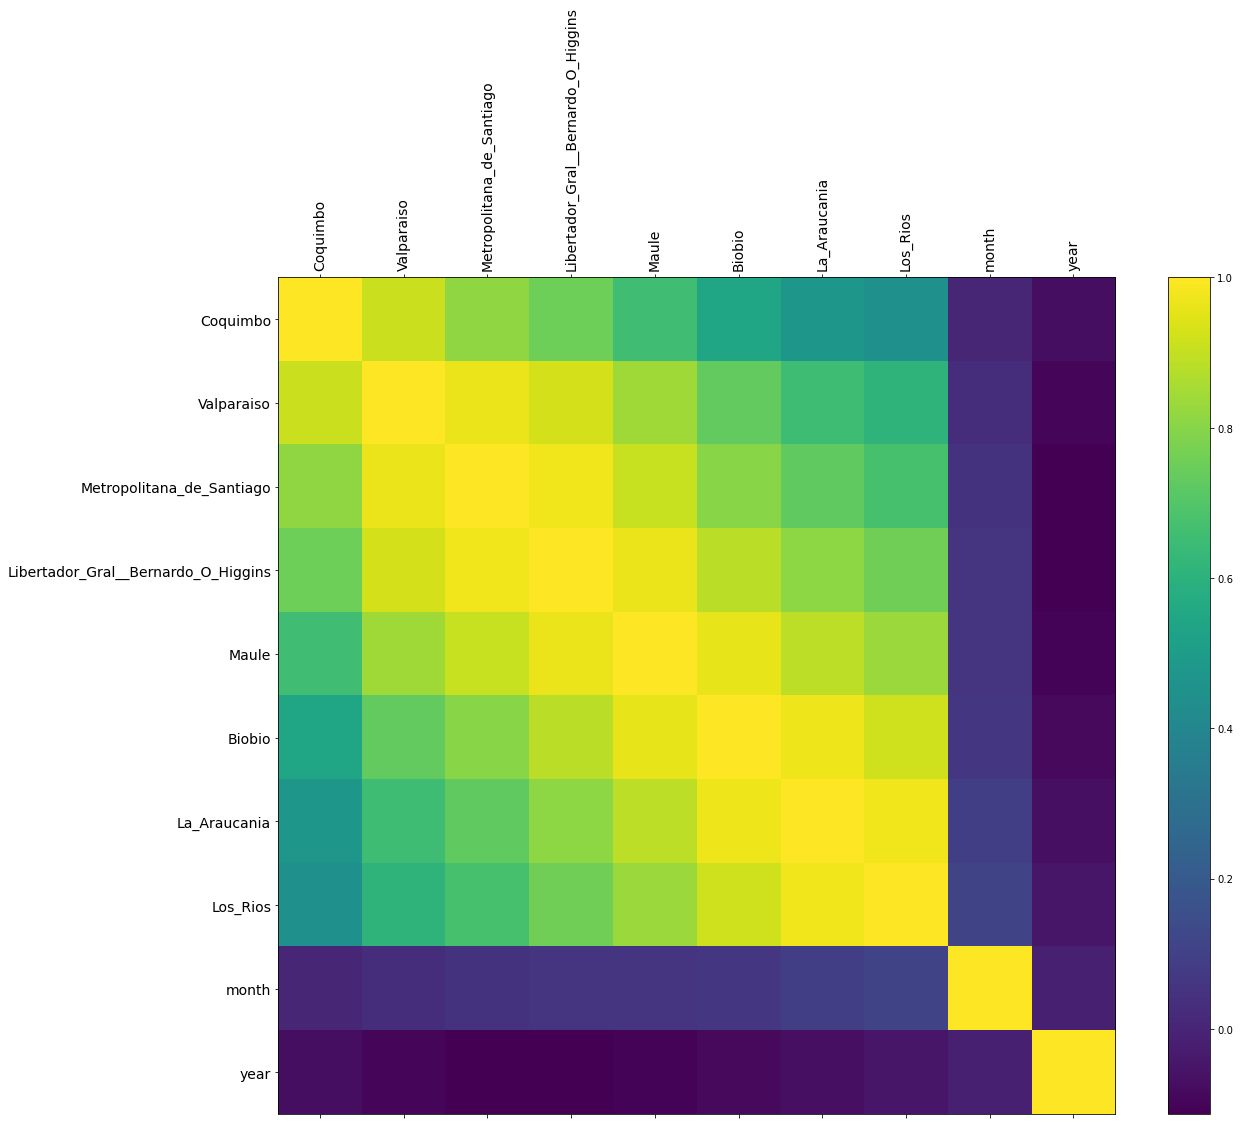

In [117]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_rain.corr(), fignum=f.number)
plt.xticks(range(df_rain.select_dtypes(['number']).shape[1]), df_rain.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_rain.select_dtypes(['number']).shape[1]), df_rain.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.show()

Nos traemos el archivo de la leche

In [306]:
df_milk = pd.read_csv('precio_leche.csv')

In [307]:
df_milk.head()

Anio  Mes  Precio_leche
0  1979  Ene          3.85
1  1979  Feb          4.58
2  1979  Mar          5.18
3  1979  Abr          6.06
4  1979  May          7.25

In [308]:
df_milk.Mes.unique()

array(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep',
       'Oct', 'Nov', 'Dic'], dtype=object)

In [309]:
months_names = {'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4,
                'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8,
                'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12}

In [310]:
df_milk['Mes'] = df_milk['Mes'].replace(months_names, regex=True)
df_milk.head()

Anio  Mes  Precio_leche
0  1979    1          3.85
1  1979    2          4.58
2  1979    3          5.18
3  1979    4          6.06
4  1979    5          7.25

In [311]:
df_bank2 = df2.copy()
df_rain2 = df_rain.copy()

# Date variables
df_bank2['Mes'] = df_bank2['Periodo'].dt.month
df_rain2['Mes'] = df_rain2['date'].dt.month
df_bank2['Anio'] = df_bank2['Periodo'].dt.year
df_rain2['Anio'] = df_rain2['date'].dt.year

Juntamos todo en un gran dataset

In [312]:
df_milk = df_milk.merge(df_bank2, how='left', on=['Mes', 'Anio'])

In [313]:
df_milk = df_milk.merge(df_rain2, how='left', on=['Mes', 'Anio'])

In [314]:
df_milk.sort_values(by=['Anio', 'Mes'], inplace=True)
del df_milk['Periodo']
del df_milk['date']

In [315]:
df_milk.describe().T.sort_values(by='count', ascending=False).\
    to_excel('stats.xlsx')

Segun internet, la region que mayor cantidad de ganado tiene es los lagos, pero no tenemos esas precipitaciones, asi que usaremos la de la region de araucania (https://www.ine.cl/docs/default-source/documentos-de-trabajo/caracterizacion-produccion-carne-bovina-en-chile-ine.pdf?sfvrsn=ff52e740_2)

Probemos con las siguientes columnas

In [316]:
df_milk = df_milk[['Anio', 'Precio_leche', 'Mes',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_de_la_onza_troy_de_oro_dolaresoz', 'Los_Rios',
       'La_Araucania', 
       'Tipo_de_cambio_del_dolar_observado_diario',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100',
       'Indice_de_produccion_industrial__mineria',
       'Indice_de_produccion_industrial__manufacturera',
       'Tipo_de_cambio_nominal_multilateral___TCM', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_industria',
       'Imacec_no_minero', 'Imacec_minero', 'Imacec_produccion_de_bienes',
       'Imacec_empalmado', 'Imacec_a_costo_de_factores',
       'Generacion_de_energia_electrica_CDEC_GWh',
       'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas']]

Por nada mas especial que ser las que tienen mas datos

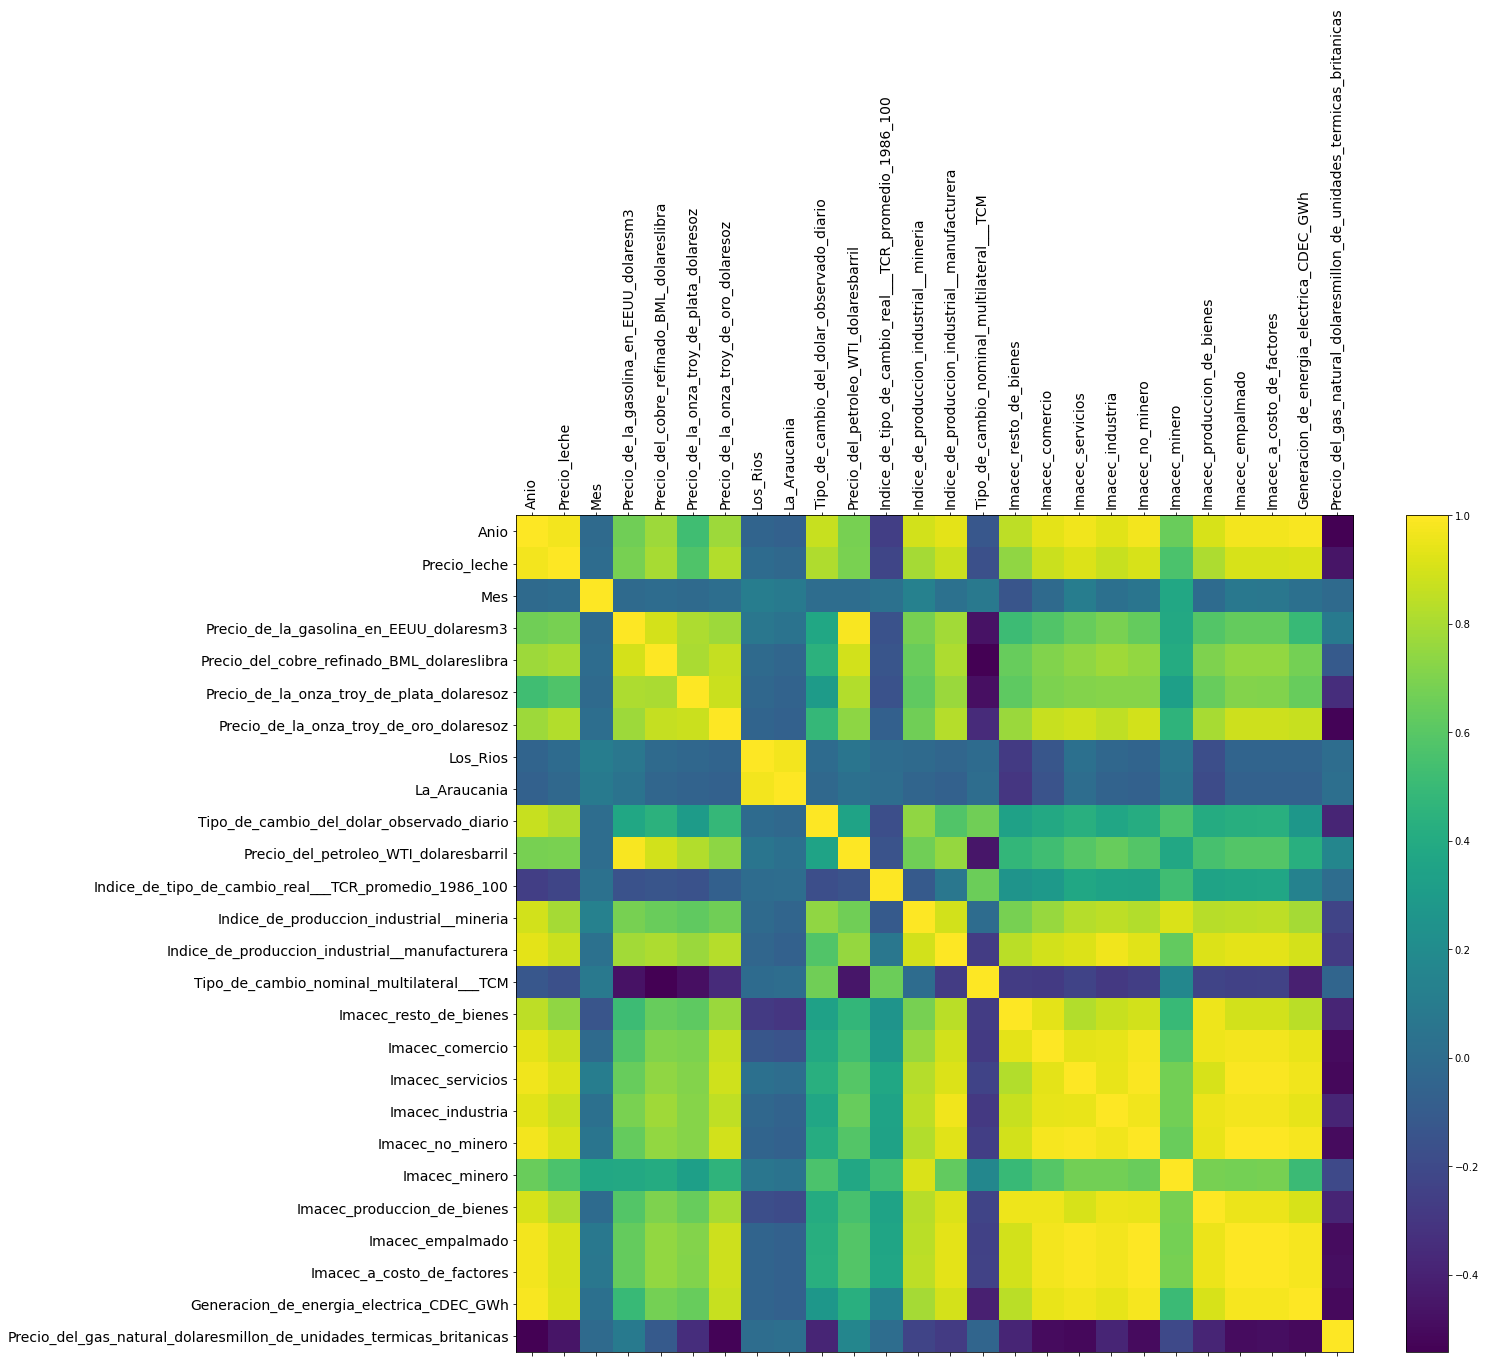

In [317]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_milk.corr(), fignum=f.number)
plt.xticks(range(df_milk.select_dtypes(['number']).shape[1]), df_milk.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_milk.select_dtypes(['number']).shape[1]), df_milk.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
plt.show()

In [318]:
df_milk = df_milk[['Anio', 'Precio_leche', 'Mes',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'La_Araucania', 
       'Tipo_de_cambio_del_dolar_observado_diario',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100',
       'Indice_de_produccion_industrial__manufacturera', 'Imacec_servicios', 
       'Generacion_de_energia_electrica_CDEC_GWh']]

In [319]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Anio                                                   506 non-null    int64  
 1   Precio_leche                                           506 non-null    float64
 2   Mes                                                    506 non-null    int64  
 3   Precio_del_cobre_refinado_BML_dolareslibra             503 non-null    float64
 4   La_Araucania                                           496 non-null    float64
 5   Tipo_de_cambio_del_dolar_observado_diario              460 non-null    float64
 6   Precio_del_petroleo_WTI_dolaresbarril                  451 non-null    float64
 7   Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  418 non-null    float64
 8   Indice_de_produccion_industrial__manufacturera    

Trimestres

In [320]:
trim = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3,
        8:3, 9:3, 10:4, 11:4, 12:4}
df_milk['trim'] = df_milk['Mes'].replace(trim, regex=True)

De alguna forma hay que hacerse cargo de lo valores nulos

In [321]:
columns = list(df_milk.columns)
columns.remove('Anio')
columns.remove('Mes')
columns.remove('trim')
columns.remove('Precio_leche')

# Interpolate missing values
df_milk = df_milk.interpolate(method ='linear', limit_direction ='forward')

# Fill the first nans values
for col in columns:
    df_milk[col] = df_milk[col].bfill()

# Compute percent change roolling mean()
for col in columns:
    df_milk[col+'_mean'] = df_milk[col].pct_change().rolling(3).mean()

# Compute percent change roolling mean()
for col in columns:
    df_milk[col+'_std'] = df_milk[col].pct_change().rolling(3).std()
    
# Set future time milk
df_milk['Precio_leche_next'] = df_milk['Precio_leche'].shift()

# Drop nans
df_milk.dropna(inplace=True)

# Delete everything after april 2020
df_milk = df_milk[(df_milk['Anio'] < 2020) |
                  ((df_milk['Anio'] == 2020) & (df_milk['Mes'] <= 4))]

In [324]:
df_milk.to_excel('milk.xlsx')

## 5- Modelo

In [366]:
df = df_milk[['Precio_leche', 'Precio_leche_next',
       'Precio_del_cobre_refinado_BML_dolareslibra_mean',
       'La_Araucania_mean', 
       'Tipo_de_cambio_del_dolar_observado_diario_mean',
       'Precio_del_petroleo_WTI_dolaresbarril_mean',
       'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100_mean',
       'Indice_de_produccion_industrial__manufacturera_mean',
        'Imacec_servicios_mean', 
       'Generacion_de_energia_electrica_CDEC_GWh_mean']]

In [367]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

X = train.drop(columns=['Precio_leche_next'])
y = train[['Precio_leche_next']]
# Set train data
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=42)


Lo ideal es dejar la mayor parte de los datos para que sean de entrenamiento y apartar un cantidad suficiente para testear los resultados, por eso dos tercios del dataset se fueron a entrenar (aunque hay q tener en cuenta que el 20% de esos dos tercios se usaran para la validación)

A falta de tiempo las variables las filtre primero por las que tenian mas datos y luego elimine todas las que tenian mucha correlación entre ellas

Completamente segura de que este no es ni de cerca el modelo perfecto, pero es una buena linea base de la que partir

In [368]:
# train
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=[tf.metrics.MeanAbsoluteError()])

# Fit model
model.fit(X_train, y_train, epochs=3000, validation_split=0.2,
          callbacks=[early_stopping, checkpoint], batch_size=3000)


Epoch 1/3000
1/1 [==============================] - 1s 781ms/step - loss: 20708.9980 - mean_absolute_error: 118.6905 - val_loss: 21208.4570 - val_mean_absolute_error: 123.5125
Epoch 2/3000
1/1 [==============================] - 0s 58ms/step - loss: 17504.7402 - mean_absolute_error: 110.8843 - val_loss: 18364.2227 - val_mean_absolute_error: 114.8726
Epoch 3/3000
1/1 [==============================] - 0s 77ms/step - loss: 15354.2021 - mean_absolute_error: 102.8045 - val_loss: 15754.6572 - val_mean_absolute_error: 106.3339
Epoch 4/3000
1/1 [==============================] - 0s 65ms/step - loss: 13018.4893 - mean_absolute_error: 94.6860 - val_loss: 13374.2217 - val_mean_absolute_error: 97.9024
Epoch 5/3000
1/1 [==============================] - 0s 80ms/step - loss: 11208.5254 - mean_absolute_error: 86.6333 - val_loss: 11222.7041 - val_mean_absolute_error: 89.6078
Epoch 6/3000
1/1 [==============================] - 0s 69ms/step - loss: 10284.8848 - mean_absolute_error: 83.2408 - val_loss: 9

1/1 [==============================] - 0s 57ms/step - loss: 825.2409 - mean_absolute_error: 18.6693 - val_loss: 229.5305 - val_mean_absolute_error: 12.4350
Epoch 50/3000
1/1 [==============================] - 0s 58ms/step - loss: 813.9657 - mean_absolute_error: 19.6242 - val_loss: 232.7494 - val_mean_absolute_error: 12.5273
Epoch 51/3000
1/1 [==============================] - 0s 56ms/step - loss: 776.4402 - mean_absolute_error: 18.9841 - val_loss: 231.9880 - val_mean_absolute_error: 12.5087
Epoch 52/3000
1/1 [==============================] - 0s 73ms/step - loss: 759.3267 - mean_absolute_error: 18.9352 - val_loss: 226.1359 - val_mean_absolute_error: 12.3476
Epoch 53/3000
1/1 [==============================] - 0s 53ms/step - loss: 829.4719 - mean_absolute_error: 18.6898 - val_loss: 214.9256 - val_mean_absolute_error: 12.0304
Epoch 54/3000
1/1 [==============================] - 0s 53ms/step - loss: 715.8383 - mean_absolute_error: 18.0729 - val_loss: 202.0871 - val_mean_absolute_error: 11

In [370]:
# Predict
y_predict = pd.DataFrame(model.predict(np.array(X_test).reshape(-1, 9)))

In [371]:
error = pd.concat([y_test.reset_index(drop=True), y_predict], axis=1)

In [374]:
error.columns = ['real', 'prediction']
error['error'] = abs(error['real'] - error['prediction'])

In [375]:
error.error.describe()

count    131.000000
mean       7.858936
std        7.492205
min        0.021896
25%        1.030469
50%        6.109153
75%       12.065274
max       32.578046
Name: error, dtype: float64

Con esto el error absoluto promedio son 8 pesos por litro de leche, con un error maximo de 32 pesos, aunque en el 75% de los casos el error a penas superaba los 12 pesos

In [376]:
error['mean_error'] = error['real'] - error['prediction']

In [378]:
error.mean_error.describe()

count    131.000000
mean       7.766528
std        7.588686
min       -1.113141
25%        0.964630
50%        6.109153
75%       12.065274
max       32.578046
Name: mean_error, dtype: float64

Al parecer el modelo tiende a sobreestimar el precio de la leche

In [380]:
error['lower_price'] = (error['real'] - error['prediction']).\
    apply(lambda x: max(x, 0))
error['higher_price'] = (error['prediction'] - error['real']).\
    apply(lambda x: max(x, 0))

In [381]:
error.describe()

real  prediction       error  mean_error  lower_price  \
count  131.000000  131.000000  131.000000  131.000000   131.000000   
mean    81.918702   74.152176    7.858936    7.766528     7.812732   
std     61.914887   55.201664    7.492205    7.588686     7.538721   
min      5.180000    5.585723    0.021896   -1.113141     0.000000   
25%     20.030000   19.252385    1.030469    0.964630     0.964630   
50%     82.630000   74.403824    6.109153    6.109153     6.109153   
75%    118.370000  106.713360   12.065274   12.065274    12.065274   
max    207.680000  185.939743   32.578046   32.578046    32.578046   

       higher_price  
count    131.000000  
mean       0.046204  
std        0.168294  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.113141

Efectivamente el modelo sobreestima el precio de la leche en la mayoria de los casos

### 5.1- Datos adicionales

Mayoritariamente si el resto del dataset tuviese menos valores faltantes, seria relativamente util poder agregar otras columnas.

Con respecto a nuevos datos, seria util tener la demanda de leche, el valor del IPC, datos sobre importaciones o exportaciones de alimentos.

La demanda de leche podría subir en algunos meses del año y quizás eso explique parte del comportamiento, el valor del IPC afecta los precios como tal y se ve que la tendencia general al precio de la leche es al alza, parte de eso lo puede explicar el IPC. Por otra parte, las importaciones y exportaciones de alimentos (y en especifico de la lecha) pueden hacer fluctuar el valor de esta en el mercado nacional, haciendola más fácil o díficil de conseguir

## 5.2- Aplicaciones

La leche es uno de los alimentos base de la canasta nutricional y por ende esta directamente correlacionado con muchos otros y describe de manera sencilla el avance en el costo de la vida

Asumiendo que una de las industrias que mas metano genera a la atmosfera es la ganadera, el precio y por ende el consumo de la leche esta relacionado con el cambio climatico

Un uso especifico que se le puede dar a este modelo que busca predecir el precio del litro de leche en el siguiente mes es controlar la producción de leche. Es decir, si como productor de leche conozco a cuanto estará el litro de leche en el futuro puedo optimizar mi proceso de tal manera de no producir recursos innecesarios y sobrantes

Un ente regulador podria ir mucho mas allá y generar cuotas de mercado a largo plazo.